# Problem 7.1

### The goal of this problem is to investigate the role of the proposed distribution in a Metropolis-Hastings algorithm designed to simulate from the posterior distribution of a parameter δ. In part (a), you are asked to simulate data from a distribution with δ known. For parts (b)-(d), assume δ is unknown with a Unif(0,1) prior distribution for δ. For parts (b)-(d), provide an appropriate plot and a table summarizing the output of the algorithm. To facilitate comparisons, use the same number of iterations, random seed, starting values, and burn-in period for all implementations of the algorithm.

### (a) Simulate 200 realizations from the mixture distribution in Equation (7.6) with δ=0.7. Draw a histogram of these data. 

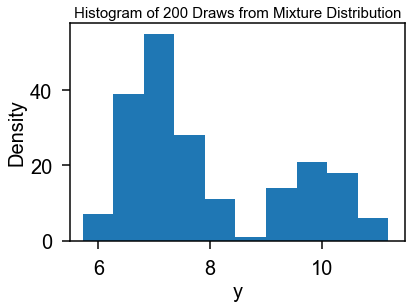

In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mu_1 = 7
mu_2 = 10
sigma_1 = sigma_2 = 0.5
np.random.seed(0)

# Delta used implicitly here
values = np.hstack((norm.rvs(loc=mu_1,scale=sigma_1,size=140),norm.rvs(loc=mu_2,scale=sigma_2,size=60)))

plt.hist(values)
plt.title("Histogram of 200 Draws from Mixture Distribution",fontsize=15)
plt.xlabel('y',fontsize=20)
plt.xlim((5.5,11.5))
plt.ylabel('Density',fontsize=20)
plt.show()


### (b) Implement an independence chain MCMC procedure to simulate from the posterior distribution of δ, using your data from part (a).

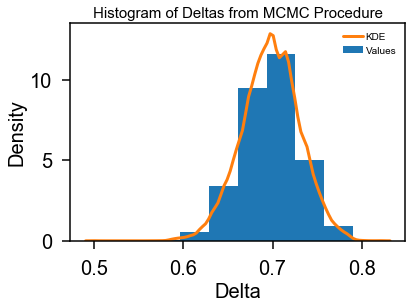

Table of Deltas from MCMC Procedure (last 100 iterations)


"Iteration,t",Delta
99900,[0.68363098]
99901,[0.68363098]
99902,[0.68363098]
99903,[0.68363098]
99904,[0.68363098]
99905,[0.68363098]
99906,[0.68363098]
99907,[0.68363098]
99908,[0.68363098]
99909,[0.68363098]


In [2]:
from scipy.stats import uniform
import seaborn as sns
import pandas as pd

m = 100000
delta = 0.5
deltas = []
deltas.append(delta)

def mix_dist(data,delta):
    return (delta*norm.pdf(data,loc=mu_1,scale=sigma_1) + (1-delta)*norm.pdf(data,loc=mu_2,scale=sigma_2))

def likelihood(delta):
    return np.product(mix_dist(values,delta))

appendedlist = []

for i in range(m):
    delta_star = uniform.rvs(loc=0,scale=1,size=1)
    
    ratio = likelihood(delta_star)/likelihood(deltas[i])
    
    prob_val = uniform.rvs(loc=0,scale=1,size=1)
    
    minimum = np.min((ratio,1))
    
    data_value = [i,deltas[i]]
    appendedlist.append(data_value)
    
    if prob_val <= minimum:
        deltas.append(delta_star)
    else:
        deltas.append(deltas[i])
        
data_value = [i,deltas[i]]
appendedlist.append(data_value)

plt.hist(deltas,density=True,label="Values")
sns.distplot(deltas,hist=False,label="KDE")
plt.title("Histogram of Deltas from MCMC Procedure",fontsize=15)
plt.xlabel('Delta',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

print("Table of Deltas from MCMC Procedure (last 100 iterations)")
df = pd.DataFrame(appendedlist, columns = ['Iteration,t','Delta'])
df = df.iloc[99900:m,:]
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

### (c) Implement a random walk chain with δ^∗ = δ(t) + ε with ε ∼Unif(−1,1)

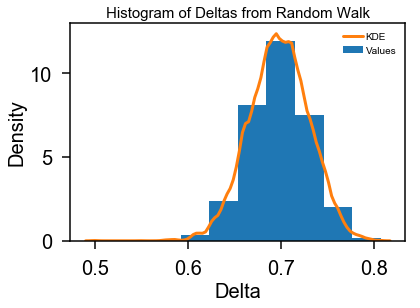

Table of Deltas from Random Walk (last 100 iterations)


"Iteration,t",Delta
99900,[0.74240787]
99901,[0.74240787]
99902,[0.74240787]
99903,[0.74240787]
99904,[0.74240787]
99905,[0.74240787]
99906,[0.74240787]
99907,[0.74240787]
99908,[0.74240787]
99909,[0.74240787]


In [3]:
m = 100000
delta = 0.5
deltas = []
deltas.append(delta)

def mix_dist(data,delta):
    return (delta*norm.pdf(data,loc=mu_1,scale=sigma_1) + (1-delta)*norm.pdf(data,loc=mu_2,scale=sigma_2))

def likelihood(delta):
    return np.product(mix_dist(values,delta))

appendedlist = []

for i in range(m):
    eps = uniform.rvs(loc=-1,scale=2,size=1)
    delta_star = deltas[i] + eps
    
    ratio = likelihood(delta_star)/likelihood(deltas[i])
    
    prob_val = uniform.rvs(loc=0,scale=1,size=1)
    
    data_value = [i,deltas[i]]
    appendedlist.append(data_value)
    
    if prob_val <= ratio and 1>= delta_star >=0:
        deltas.append(delta_star)
    else:
        deltas.append(deltas[i])
    
data_value = [i,deltas[i]]
appendedlist.append(data_value)

plt.hist(deltas,density=True,label="Values")
sns.distplot(deltas,hist=False,label="KDE")
plt.title("Histogram of Deltas from Random Walk",fontsize=15)
plt.xlabel('Delta',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

print("Table of Deltas from Random Walk (last 100 iterations)")
df = pd.DataFrame(appendedlist, columns = ['Iteration,t','Delta'])
df = df.iloc[99900:m,:]
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

### (d) Reparameterize the problem letting U = log{δ/(1 − δ)} and U^∗ = u(t) + ε. Implement a random walk chain in U-space as in Equation (7.8).

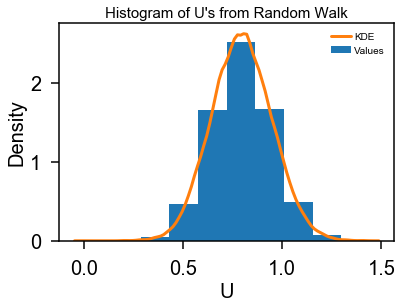

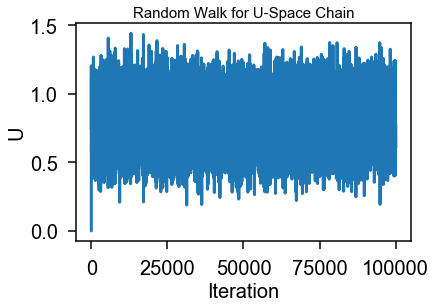

Table of U's from Random Walk (last 100 iterations)


"Iteration,t",Delta
99900,[0.67124459]
99901,[0.67124459]
99902,[0.67124459]
99903,[0.67124459]
99904,[0.85025105]
99905,[0.85025105]
99906,[0.85025105]
99907,[0.85025105]
99908,[0.85025105]
99909,[0.85025105]


In [4]:
from scipy.special import expit,logit

m = 100000
delta = logit(0.5)
deltas = []
deltas.append(delta)

def mix_dist(data,u):
    return (expit(u)*norm.pdf(data,loc=mu_1,scale=sigma_1) + (1-expit(u))*norm.pdf(data,loc=mu_2,scale=sigma_2))

def likelihood(delta):
    return np.product(mix_dist(values,delta))

appendedlist = []

for i in range(m-1):
    eps = uniform.rvs(loc=-1,scale=2,size=1)
    delta_star = deltas[i] + eps
    
    jacobian = np.abs((1/np.exp(deltas[i]))/((1+np.exp(deltas[i]))**2))
    jacobian_star = np.abs((1/np.exp(delta_star))/((1+np.exp(delta_star))**2))
    
    ratio = (likelihood(delta_star)*jacobian_star)/(likelihood(deltas[i])*jacobian)
    
    prob_val = uniform.rvs(loc=0,scale=1,size=1)
    
    data_value = [i,deltas[i]]
    appendedlist.append(data_value)
    
    if prob_val <= ratio and 1>= expit(delta_star) >=0:
        deltas.append(delta_star)
    else:
        deltas.append(deltas[i])

data_value = [i,deltas[i]]
appendedlist.append(data_value)
        
plt.figure()
plt.hist(deltas,density=True,label="Values")
sns.distplot(deltas,hist=False,label="KDE")
plt.title("Histogram of U's from Random Walk",fontsize=15)
plt.xlabel('U',fontsize=20)
plt.ylabel('Density',fontsize=20)

vals = np.linspace(0,100000,100000)

plt.figure()
plt.plot(vals,deltas)
plt.title("Random Walk for U-Space Chain",fontsize=15)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('U',fontsize=20)
plt.show()

print("Table of U's from Random Walk (last 100 iterations)")
df = pd.DataFrame(appendedlist, columns = ['Iteration,t','Delta'])
df = df.iloc[99900:m,:]
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

### (e) Compare the estimates and convergence behavior of the three algorithms.

The algorithm that got the closest was the Random Walk. For MCMC, its final iteration, delta was equal to 0.6438 which is 0.0562 away from the actual delta of 0.7. The random walk chain method had a final delta equal to 0.7162 which is 0.0162 away from the true delta. Finally, the reparameterized random walk chain had a final delta equal to 0.7811 which is 0.0811 away from the true delta. As for convergence behavior, they all seem to be very similar with the last 100 iterations of all of them being in the 0.6s and 0.7s which is where we want to be. I will say that the convergence isn't great for the MCMC and Reparameterized Random Walk because they were both farther away and depending on the number of iterations done, they could have been closer or farther which isn't what you want. 

# Problem 7.2

### Simulating from the mixture distribution in Equation (7.6) is straightforward [see part (a) of Problem 7.1]. However, using the Metropolis–Hastings algorithm to simulate realizations from this distribution is useful for exploring the role of the proposal distribution.

### (a) Implement a Metropolis–Hastings algorithm to simulate from Equation (7.6) with δ = 0.7, using N(x(t), 0.01^2) as the proposal distribution. For each of three starting values, x(0) = 0, 7, and 15, run the chain for 10,000 iterations. Plot the sample path of the output from each chain. If only one of the sample paths was available, what would you conclude about the chain? For each of the simulations, create a histogram of the realizations with the true density superimposed on the histogram. Based on your output from all three chains, what can you say about the behavior of the chain?

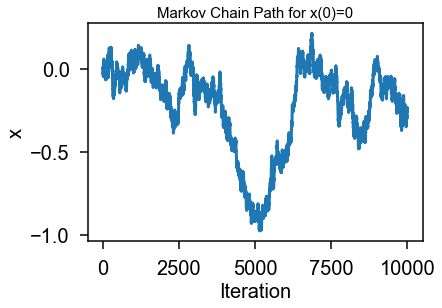

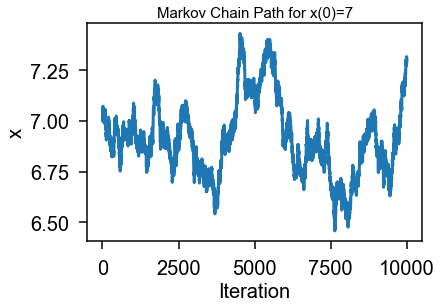

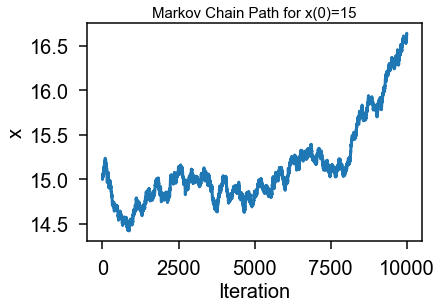

In [5]:
from scipy.stats import norm
import numpy as np

n = 10000
mu_1 = 7
mu_2 = 10
sigma_1 = sigma_2 = 0.5
delta = 0.7

# f function
def mix_distr(data):
    return (delta*norm.pdf(data,loc=mu_1,scale=sigma_1) + (1-delta)*norm.pdf(data,loc=mu_2,scale=sigma_2))

def function(x):
    x_vals = []
    x_vals.append(x)
    for i in range(n-1):
        x = x_vals[i]
        x_star = norm.rvs(loc=x,scale=0.01,size=1)

        ratio = (mix_distr(x_star)*norm.pdf(x,loc=x,scale=0.01))/(mix_distr(x)*norm.pdf(x_star,loc=x,scale=0.01))
        minimum = np.min((ratio,1))

        prob_val = uniform.rvs(loc=0,scale=1,size=1)

        if prob_val <= minimum:
            x_vals.append(x_star)
        else:
            x_vals.append(x_vals[i])
    return x_vals
            

x1 = function(0)
x2 = function(7)
x3 = function(15)
vals = np.linspace(0,n,n)

plt.figure()
plt.plot(vals,x1)
plt.title("Markov Chain Path for x(0)=0",fontsize=15)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('x',fontsize=20)
plt.figure()
plt.plot(vals,x2)
plt.title("Markov Chain Path for x(0)=7",fontsize=15)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('x',fontsize=20)
plt.figure()
plt.plot(vals,x3)
plt.title("Markov Chain Path for x(0)=15",fontsize=15)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('x',fontsize=20)
plt.show()

I would conclude that the chain does a very poor job of mixing and doesn't sample all the values very well. 

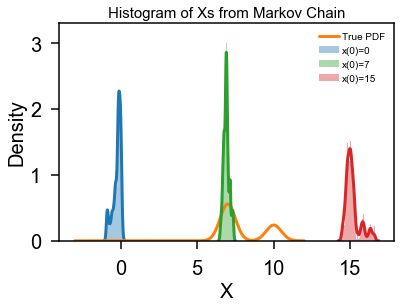

In [6]:
values = np.linspace(-3,12,10000)

plt.figure()
sns.distplot(x1,norm_hist=True,kde=True,label="x(0)=0")
plt.plot(values,mix_distr(values),label="True PDF")
sns.distplot(x2,norm_hist=True,kde=True,label="x(0)=7")
sns.distplot(x3,norm_hist=True,kde=True,label="x(0)=15")
plt.title("Histogram of Xs from Markov Chain",fontsize=15)
plt.xlabel('X',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.legend()
plt.show()

I would say that the chain does not behave well since none of the starting values get us to a point where the values match the mixture distribution from equation (7.6). 

### (b) Now change the proposal distribution to improve the convergence properties of the chain. Using the new proposal distribution, repeat part (a).

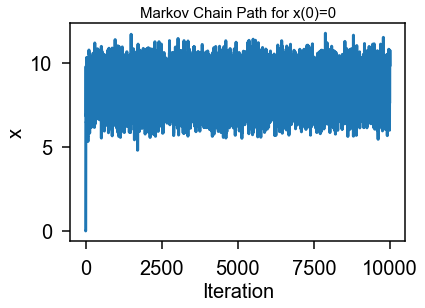

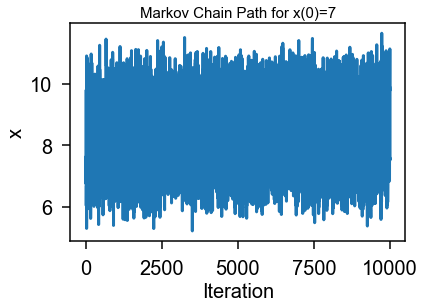

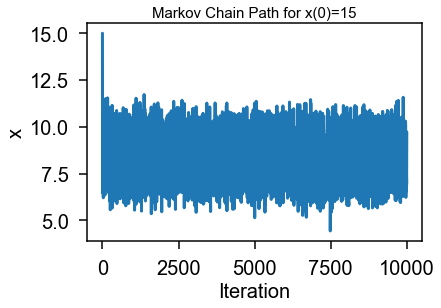

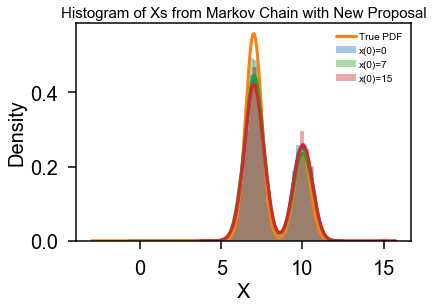

In [7]:
from scipy.stats import norm
import numpy as np

n = 10000
mu_1 = 7
mu_2 = 10
sigma_1 = sigma_2 = 0.5
delta = 0.7

# f function
def mix_distr(data):
    return (delta*norm.pdf(data,loc=mu_1,scale=sigma_1) + (1-delta)*norm.pdf(data,loc=mu_2,scale=sigma_2))

def function(x):
    x_vals = []
    x_vals.append(x)
    for i in range(n-1):
        x = x_vals[i]
        x_star = norm.rvs(loc=x,scale=3,size=1)

        ratio = (mix_distr(x_star)*norm.pdf(x,loc=x,scale=3))/(mix_distr(x)*norm.pdf(x_star,loc=x,scale=3))
        minimum = np.min((ratio,1))

        prob_val = uniform.rvs(loc=0,scale=1,size=1)

        if prob_val <= minimum:
            x_vals.append(x_star)
        else:
            x_vals.append(x_vals[i])
    return x_vals
            

x1 = function(0)
x2 = function(7)
x3 = function(15)
vals = np.linspace(0,n,n)

plt.figure()
plt.plot(vals,x1)
plt.title("Markov Chain Path for x(0)=0",fontsize=15)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('x',fontsize=20)
plt.figure()
plt.plot(vals,x2)
plt.title("Markov Chain Path for x(0)=7",fontsize=15)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('x',fontsize=20)
plt.figure()
plt.plot(vals,x3)
plt.title("Markov Chain Path for x(0)=15",fontsize=15)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('x',fontsize=20)
plt.show()

values = np.linspace(-3,12,10000)

plt.figure()
sns.distplot(x1,norm_hist=True,kde=True,label="x(0)=0")
plt.plot(values,mix_distr(values),label="True PDF")
sns.distplot(x2,norm_hist=True,kde=True,label="x(0)=7")
sns.distplot(x3,norm_hist=True,kde=True,label="x(0)=15")
plt.title("Histogram of Xs from Markov Chain with New Proposal",fontsize=15)
plt.xlabel('X',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.legend()
plt.show()

This new proposal distribution with a standard deviation of 3 more closely matches the mixture distribution that we were trying achieve. The chain samples all the values very well which is why the path is much more dense than in part (a).